<a href="https://colab.research.google.com/github/VVKMulukutla/FML/blob/main/UnivariateLR_RidgeReg_Company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Ridge

In [2]:
cd = pd.read_csv('/content/drive/MyDrive/Company_data.csv')
print(cd)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [3]:
cd.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [4]:
X_train, X_test, y_train, y_test = tts(cd['TV'], cd['Sales'], test_size=0.3, random_state = 42)

In [15]:
ridReg = Ridge(alpha = 20)

In [6]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [16]:
ridReg.fit(X_train, y_train)

Ridge(alpha=20)

In [17]:
ridReg_train_pred = ridReg.predict(X_train)

In [11]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

In [18]:


print("Training Accuracies : ")
print("Mean Absolute Error : ", mae(ridReg_train_pred, y_train))
print("Mean Squared Error : ", mse(ridReg_train_pred, y_train))
print("Root Mean Squared Error : ", mse(ridReg_train_pred, y_train)**0.5)
print("R2 Score : ", r2(ridReg_train_pred, y_train))

Training Accuracies : 
Mean Absolute Error :  1.8461455505774236
Mean Squared Error :  5.265926501412683
Root Mean Squared Error :  2.2947606632092774
R2 Score :  0.7494065587264109


In [19]:
ridReg_test_pred = ridReg.predict(X_test)

In [20]:
print("Test Data Accuracies : ")
print("Mean Absolute Error : ", mae(ridReg_test_pred, y_test))
print("Mean Squared Error : ", mse(ridReg_test_pred, y_test))
print("Root Mean Squared Error : ", mse(ridReg_test_pred, y_test)**0.5)
print("R2 Score : ", r2(ridReg_test_pred, y_test))

Test Data Accuracies : 
Mean Absolute Error :  1.806928559294343
Mean Squared Error :  5.179569647621869
Root Mean Squared Error :  2.275866790394787
R2 Score :  0.7690833114880247


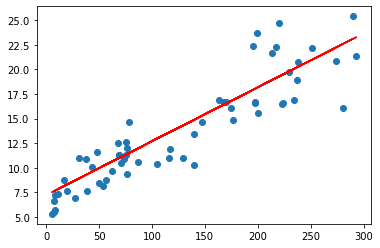

In [26]:
plt.plot(X_test, ridReg_test_pred, color = 'r')
plt.scatter(X_test, y_test)